In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")

crop.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [3]:
crop.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [4]:
crop.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [5]:
crop.shape

(2200, 8)

In [6]:
# Count the number of missing values in each column of the crop DataFrame
missing_values = crop.isnull().sum()

# Print the results
print(missing_values)

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [7]:
# To check wether there null values or not using the useful function Assert
null_check = crop.isnull().values.any()

# Assert that there are no null values
assert not null_check, "There are null values in the crop dataframe."

In [8]:
# Eliminating all duplicated rows with drop_duplicates
num_rows_before = crop.shape[0]

# Drop any duplicates from the DataFrame
crop = crop.drop_duplicates()

# Get the number of rows in the cleaned DataFrame
num_rows_after = crop.shape[0]

# Print the results
print(f"Dropped {num_rows_before - num_rows_after} duplicate rows from the crop DataFrame.")

Dropped 0 duplicate rows from the crop DataFrame.


In [9]:
# Check for any duplicate rows in the crop DataFrame
duplicates = crop[crop.duplicated(keep=False)]

# Assert that there are no duplicate rows
assert len(duplicates) == 0, "The crop DataFrame contains duplicate rows."

In [10]:
# Calculate the number of unique values in each column of the crop DataFrame
unique_counts = crop.nunique()

# Print the results
print(unique_counts)

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64


In [11]:
# Get the unique labels in the crop DataFrame
unique_labels = set(crop['label'])

# Calculate the number of unique labels
num_unique_labels = len(unique_labels)

# Print the results
print("Unique labels:", unique_labels)
print("Number of unique labels:", num_unique_labels)


Unique labels: {'banana', 'grapes', 'apple', 'pigeonpeas', 'muskmelon', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'cotton', 'mango', 'maize', 'coconut', 'orange', 'rice', 'watermelon', 'coffee', 'jute', 'papaya', 'chickpea', 'mothbeans', 'kidneybeans'}
Number of unique labels: 22


In [12]:
crop.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [13]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 154.7+ KB


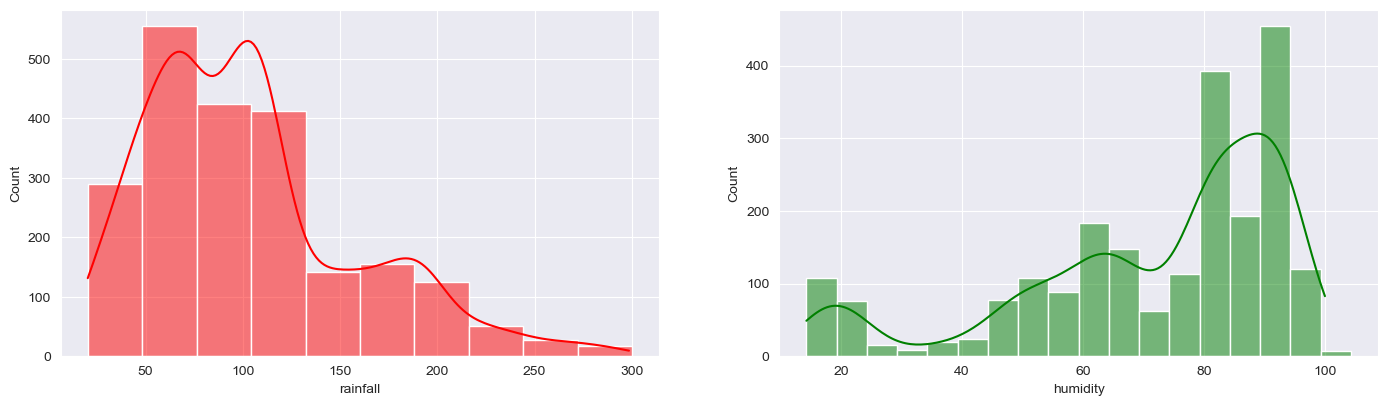

In [15]:
# Create a Figure object with a size of 17 by 4.5 inches
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 4.5))

# Create a histogram with a kernel density estimate of the 'rainfall' column in the crop DataFrame on the left subplot
sns.histplot(crop.rainfall, binwidth=28, color="red", kde={'alpha':0.5}, ax=ax1)

# Create a histogram with a kernel density estimate of the 'humidity' column in the crop DataFrame on the right subplot
sns.histplot(crop.humidity, binwidth=5, color="green", kde={'alpha':0.5}, ax=ax2)

# Display the Figure
plt.show()

In [17]:
#Checking the Statistics for all the crops
mean_values = crop.mean()
for column_name, mean_value in mean_values.items():
    print("Average {} : {:.2f}".format(column_name, mean_value))

Average N : 50.55
Average P : 53.36
Average K : 48.15
Average temperature : 25.62
Average humidity : 71.48
Average ph : 6.47
Average rainfall : 103.46


C:\Users\vifer\AppData\Local\Temp\ipykernel_24268\3215342253.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = crop.mean()


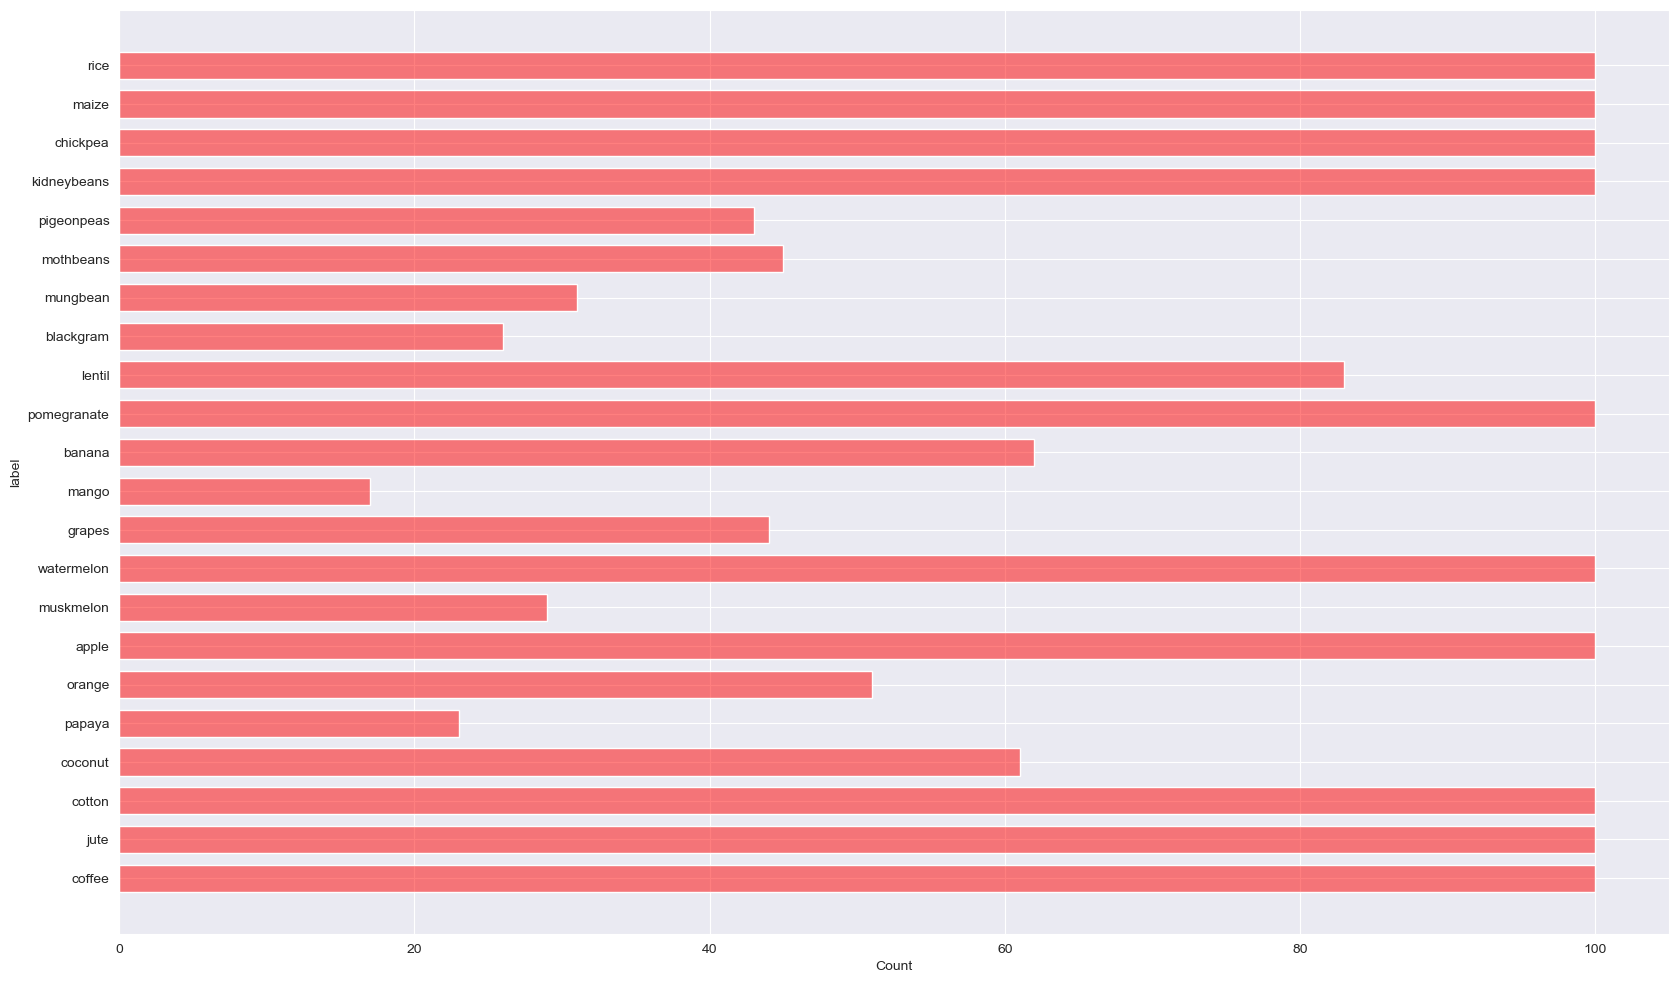

In [19]:
#The best suitable temperatures for the growth of the mango tree are when the temperature is 30 - 32 ° C
#and it can withstand high temperatures between 44 - 48 ° C. and 
# At temperatures of 18 degrees Celsius or less, they die just as mango trees are damaged
plt.figure(figsize=(20,12))
crop_median_temperatures = crop[(crop['temperature'] > 15) & (crop['temperature'] <= 28)]
sns.histplot(y=crop_median_temperatures['label'], shrink=.7, color="red", alpha=0.5)
plt.show()

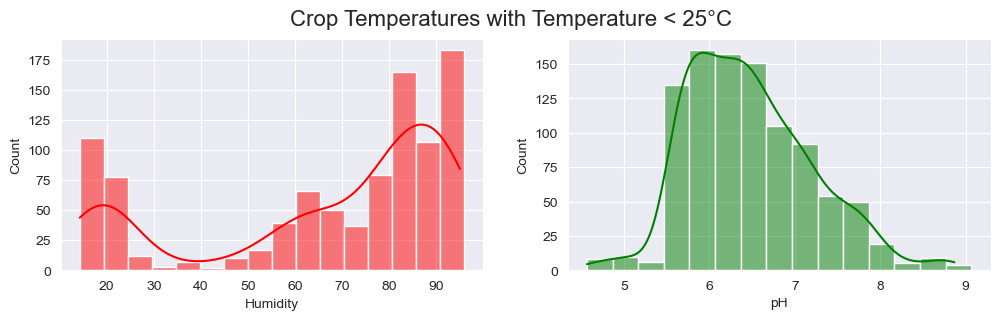

In [20]:
# Whenever the temperature is more than 20, every time the humidity level increases,
# it is not a requirement to constantly increase, it can be lowered, but it will not drop below 50%
#The Optimum pH for most plants is between 5.5 and 8 , depending on the type of plant

# Set up the figure and data subset
fig, axs = plt.subplots(1, 2, figsize=(12, 3))
Crop_Temperatures = crop[crop['temperature'] < 25]

# Create the first subplot with a histogram of humidity values
sns.histplot(Crop_Temperatures['humidity'], ax=axs[0], binwidth=5.1, color='red', kde=True, alpha=0.5)
axs[0].set_xlabel('Humidity')

# Create the second subplot with a histogram of pH values
sns.histplot(Crop_Temperatures['ph'], ax=axs[1], binwidth=0.3, color='green', kde=True, alpha=0.5)
axs[1].set_xlabel('pH')

# Add a title to the entire figure
fig.suptitle('Crop Temperatures with Temperature < 25°C', fontsize=16)

# Display the plot
plt.show()

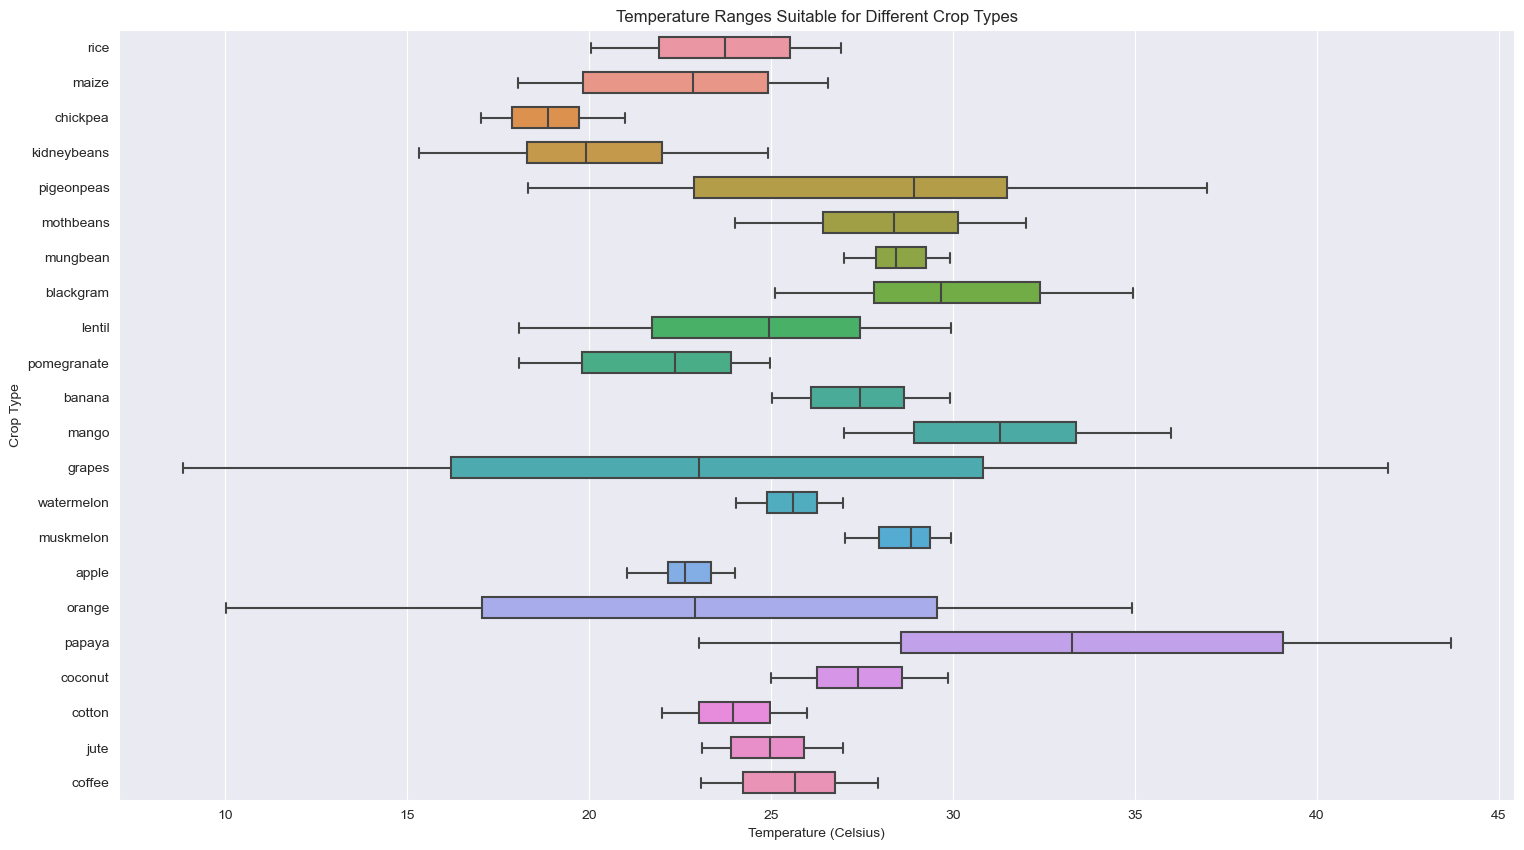

In [22]:
# As shown in the figure, plants that need high or low temperatures, and this is an important point in determining when to plant a plant.
# Display a box plot showing the temperature ranges suitable for different crop types.
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(x=crop['temperature'], y=crop['label'],
            whis=[0, 100], width=.6 , orient="h", ax=ax)
ax.set_xlabel('Temperature (Celsius)')
ax.set_ylabel('Crop Type')
ax.set_title('Temperature Ranges Suitable for Different Crop Types')
plt.show()

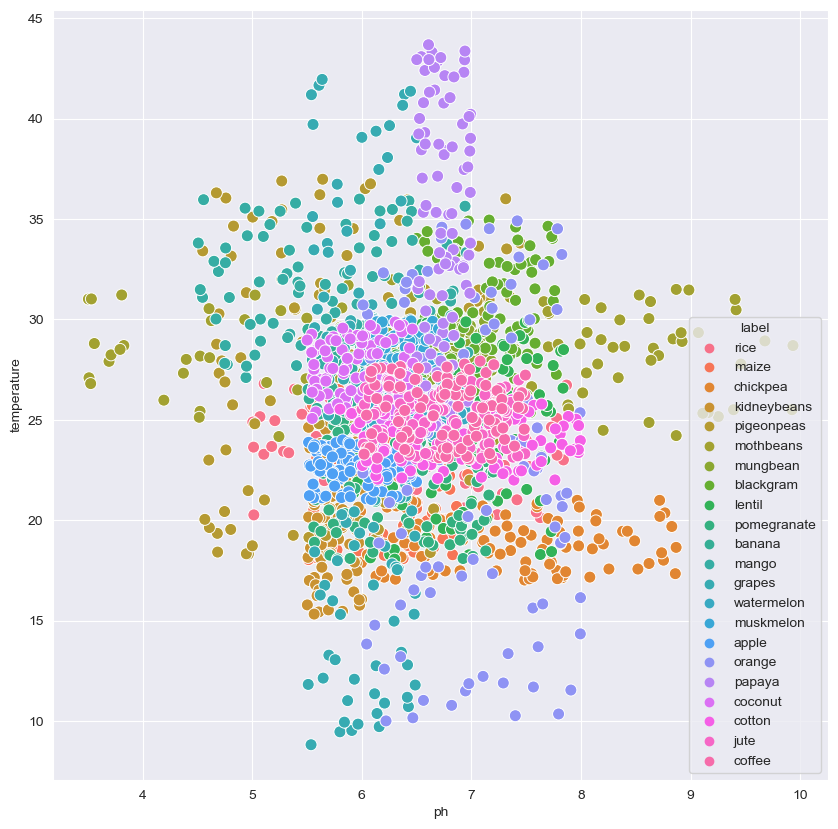

In [24]:
# In general, when the temperature rises above 21 pH decrease 
# The Optimum pH for most plants is between 5.5 and 8 , depending on the type of plant
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=crop, x="ph", y="temperature", hue="label", s=75, ax=ax)
plt.show()

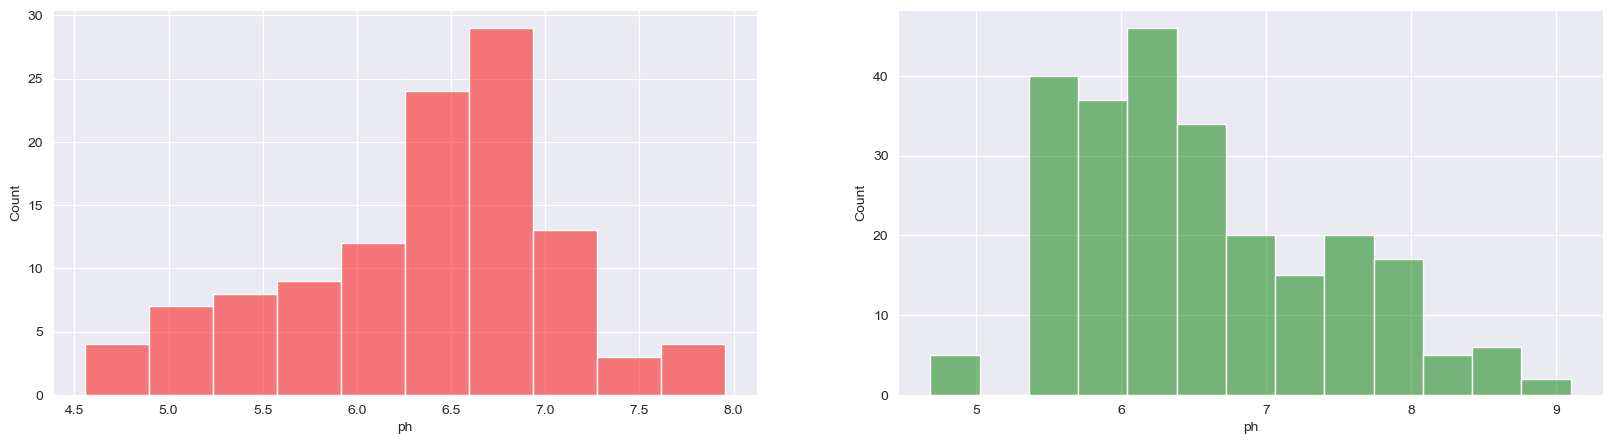

In [26]:
# pH decreases with increase in temperature.
Crop_high_Temperatures = crop[crop["temperature"] > 34]
Crop_low_Temperatures = crop[crop["temperature"] < 19.5]
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(ax=axs[0], data=Crop_high_Temperatures, x="ph", binwidth=.34, color="red", alpha=0.5)
sns.histplot(ax=axs[1], data=Crop_low_Temperatures, x="ph", binwidth=.34, color="green", alpha=0.5)
plt.show()

In [28]:
low_temp_min_ph = Crop_low_Temperatures.ph.min()
high_temp_min_ph = Crop_high_Temperatures.ph.min()
low_temp_max_ph = Crop_low_Temperatures.ph.max()
high_temp_max_ph = Crop_high_Temperatures.ph.max()
low_temp_avg_ph = Crop_low_Temperatures.ph.mean()
high_temp_avg_ph = Crop_high_Temperatures.ph.mean()

print("Lowest pH value at low temperatures: {:.2f}".format(low_temp_min_ph))
print("Lowest pH value at high temperatures: {:.2f}".format(high_temp_min_ph))
print("---")
print("Highest pH value at low temperatures: {:.2f}".format(low_temp_max_ph))
print("Highest pH value at high temperatures: {:.2f}".format(high_temp_max_ph))
print("---")
print("Average pH value at low temperatures: {:.2f}".format(low_temp_avg_ph))
print("Average pH value at high temperatures: {:.2f}".format(high_temp_avg_ph))

Lowest pH value at low temperatures: 4.68
Lowest pH value at high temperatures: 4.56
---
Highest pH value at low temperatures: 8.87
Highest pH value at high temperatures: 7.79
---
Average pH value at low temperatures: 6.54
Average pH value at high temperatures: 6.35


In [30]:
# Print summer crops
summer_crops = crop[(crop['temperature'] > 30) & (crop['humidity'] > 50)]['label'].unique()
print("Summer Crops:\n" + "\n".join(summer_crops))
print("\n")
# Print winter crops
winter_crops = crop[(crop['temperature'] < 20) & (crop['humidity'] < 35)]['label'].unique()
print("Winter Crops:\n" + "\n".join(winter_crops))
print("\n")
# Print rainy crops
rainy_crops = crop[(crop['rainfall'] > 200) & (crop['humidity'] > 30)]['label'].unique()
print("Rainy Crops:\n" + "\n".join(rainy_crops))

Summer Crops:
pigeonpeas
mothbeans
blackgram
mango
grapes
orange
papaya


Winter Crops:
chickpea
kidneybeans
pigeonpeas


Rainy Crops:
rice
papaya
coconut


In [40]:
# As shown in the figure, plants that need high or low temperatures, and this is an important point in determining when to plant a plant.
import plotly.express as px

fig = px.box(crop, x="K", y="label", color="label", orientation="h")
fig.show()


In [47]:
print("Crops which requires very Low Ratio of Potassium Content in Soil:", crop[crop['K']  < 15]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", crop[crop['K'] > 175]['label'].unique())
print("Crops which requires median Ratio of Potassium Content in Soil:", crop.query("K > 45 & K < 90")['label'].unique())

Crops which requires very Low Ratio of Potassium Content in Soil: ['orange']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires median Ratio of Potassium Content in Soil: ['chickpea' 'banana' 'watermelon' 'muskmelon' 'papaya']


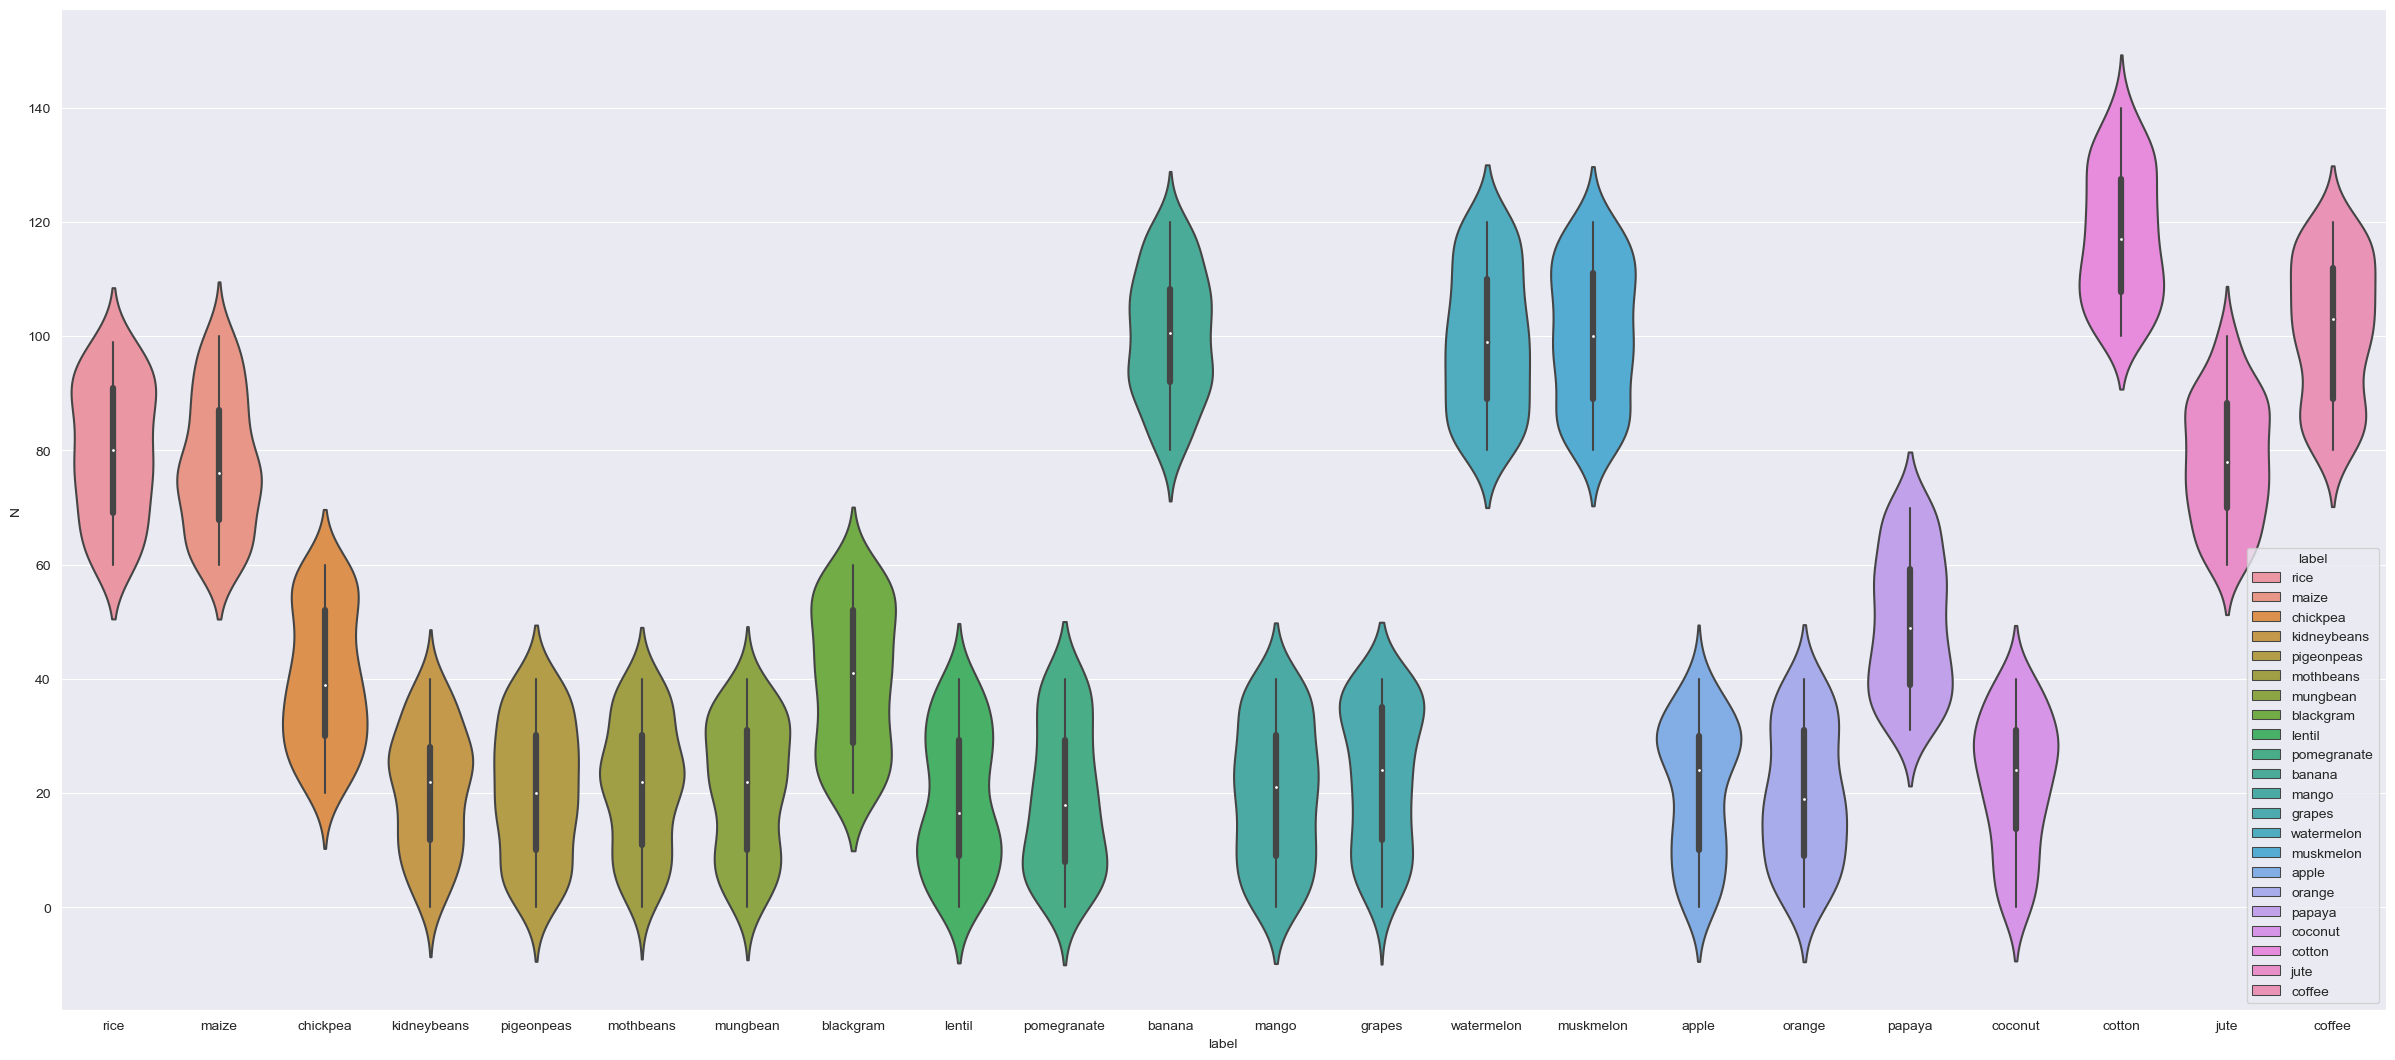

In [33]:
fig, ax = plt.subplots(figsize=(30,13))
sns.violinplot(x="label", y="N", data=crop, hue="label", dodge=False, ax=ax)
plt.show()

In [34]:
# Crops which requires very Low Ratio of Nitrogen Content in Soil
low_nitrogen_crops = crop.loc[crop['N'] < 10, 'label'].unique()
print("Crops which require very Low Ratio of Nitrogen Content in Soil:", low_nitrogen_crops)

# Crops which requires very High Ratio of Nitrogen Content in Soil
high_nitrogen_crops = crop.loc[crop['N'] > 110, 'label'].unique()
print("Crops which require very High Ratio of Nitrogen Content in Soil:", high_nitrogen_crops)

# Crops which requires median Ratio of Nitrogen Content in Soil
median_nitrogen_crops = crop.query("N > 40 & N < 80")['label'].unique()
print("Crops which require median Ratio of Nitrogen Content in Soil:", median_nitrogen_crops)


Crops which require very Low Ratio of Nitrogen Content in Soil: ['kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'lentil' 'pomegranate'
 'mango' 'grapes' 'apple' 'orange' 'coconut']
Crops which require very High Ratio of Nitrogen Content in Soil: ['banana' 'watermelon' 'muskmelon' 'cotton' 'coffee']
Crops which require median Ratio of Nitrogen Content in Soil: ['rice' 'maize' 'chickpea' 'blackgram' 'papaya' 'jute']


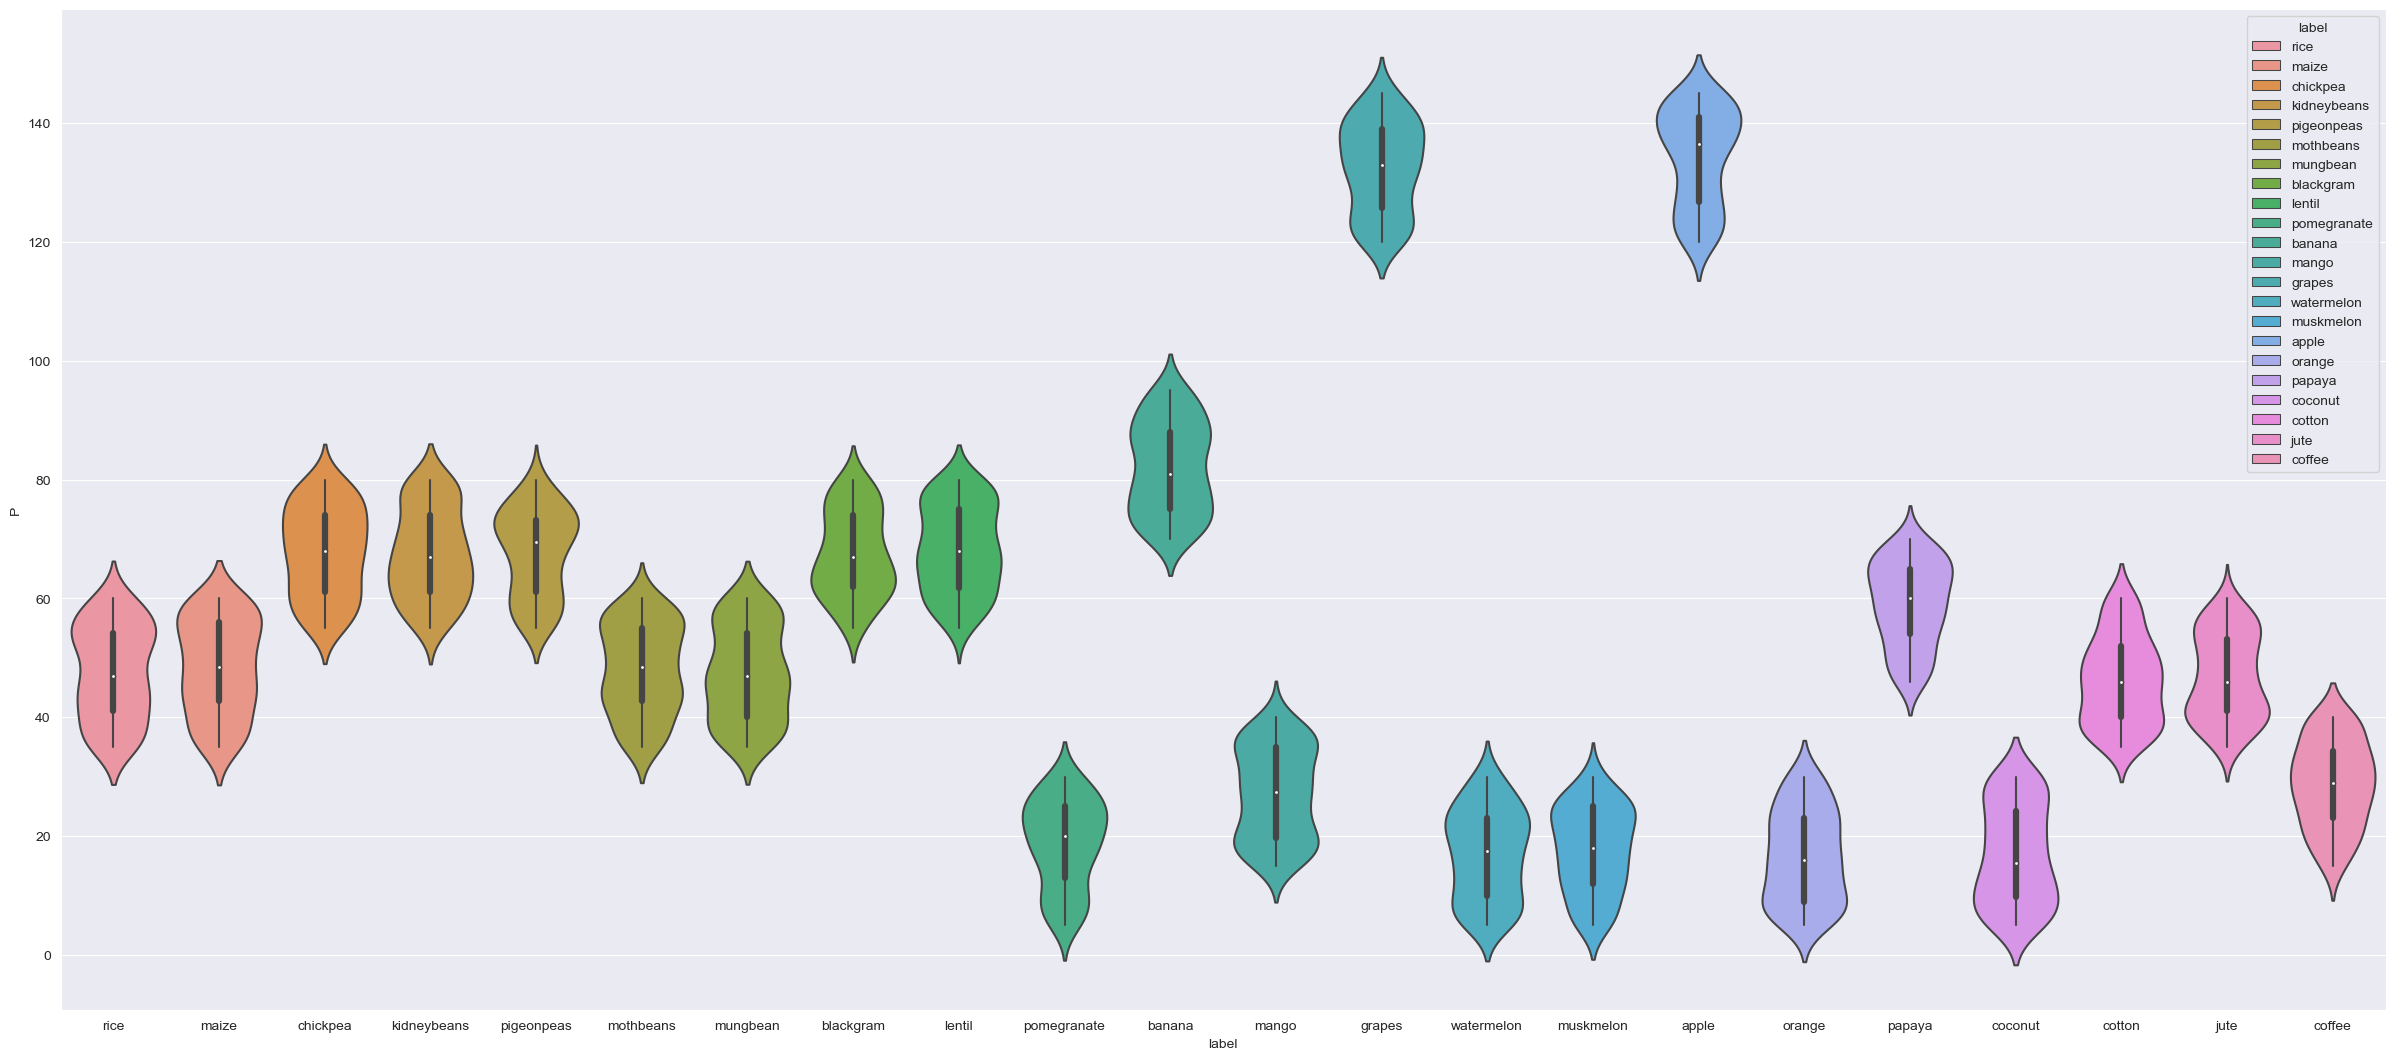

In [35]:
fig, ax = plt.subplots(figsize=(30, 13))

sns.violinplot(x="label", y="P", data=crop, hue="label", dodge=False, ax=ax)

plt.show()

In [36]:
# Low ratio of Phosphorus Content in Soil
low_p_crops = crop[crop['P']  < 10]['label'].unique()
print("Crops which require very low ratio of Phosphorus Content in Soil:", low_p_crops)

# High ratio of Phosphorus Content in Soil
high_p_crops = crop[crop['P'] > 110]['label'].unique()
print("Crops which require very high ratio of Phosphorus Content in Soil:", high_p_crops)

# Median ratio of Phosphorus Content in Soil
median_p_crops = crop.query("P > 70 & P < 110")['label'].unique()
print("Crops which require median ratio of Phosphorus Content in Soil:", median_p_crops)

Crops which require very low ratio of Phosphorus Content in Soil: ['pomegranate' 'watermelon' 'muskmelon' 'orange' 'coconut']
Crops which require very high ratio of Phosphorus Content in Soil: ['grapes' 'apple']
Crops which require median ratio of Phosphorus Content in Soil: ['chickpea' 'kidneybeans' 'pigeonpeas' 'blackgram' 'lentil' 'banana']


In [38]:
from ipywidgets import interact
import ipywidgets as widgets

def compare(conditions):
    for crop_label in ['rice', 'cotton', 'mango', 'apple', 'maize']:
        crop_df = crop[crop['label'] == crop_label]
        print()
        print(f"1- {conditions} level in soil relative to {crop_label.capitalize()}: ")
        print(f"The {crop_label.capitalize()} plant has the mean {conditions} content in the soil = {crop_df[conditions].mean()}")
        print(f"The {crop_label.capitalize()} plant has the lowest {conditions} content in the soil = {crop_df[conditions].min()}")
        print(f"The {crop_label.capitalize()} plant has the highest {conditions} content in the soil = {crop_df[conditions].max()}")

interact(compare, conditions = ['N', 'P', 'K'])

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K'), value='N'), Output()), _dom_…

<function __main__.compare(conditions)>

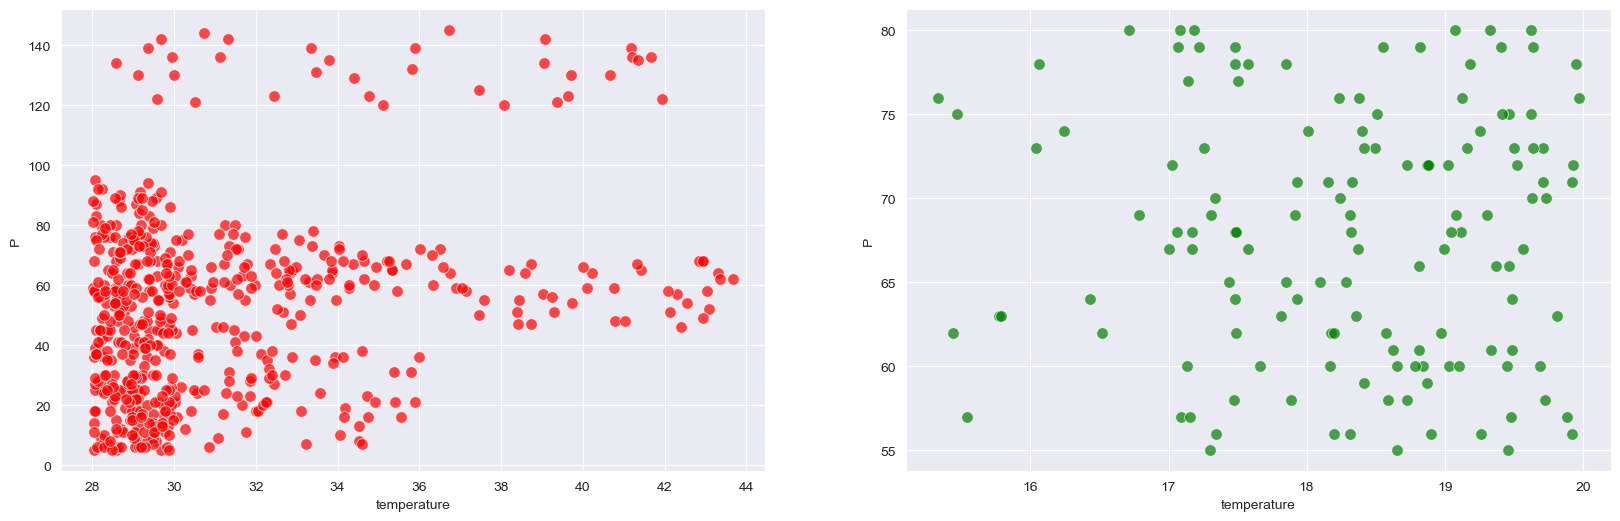

In [84]:
high_weather = crop[(crop["temperature"] > 28) & (crop["humidity"] > 50)]
cold_weather = crop[(crop["temperature"] < 20) & (crop["humidity"] < 40)]
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.scatterplot(x="temperature", y="P", data=high_weather, color='red', s=70, alpha=0.7, ax=ax[0])
sns.scatterplot(x="temperature", y="P", data=cold_weather, color="green", s=70, alpha=0.7, ax=ax[1])
plt.show()

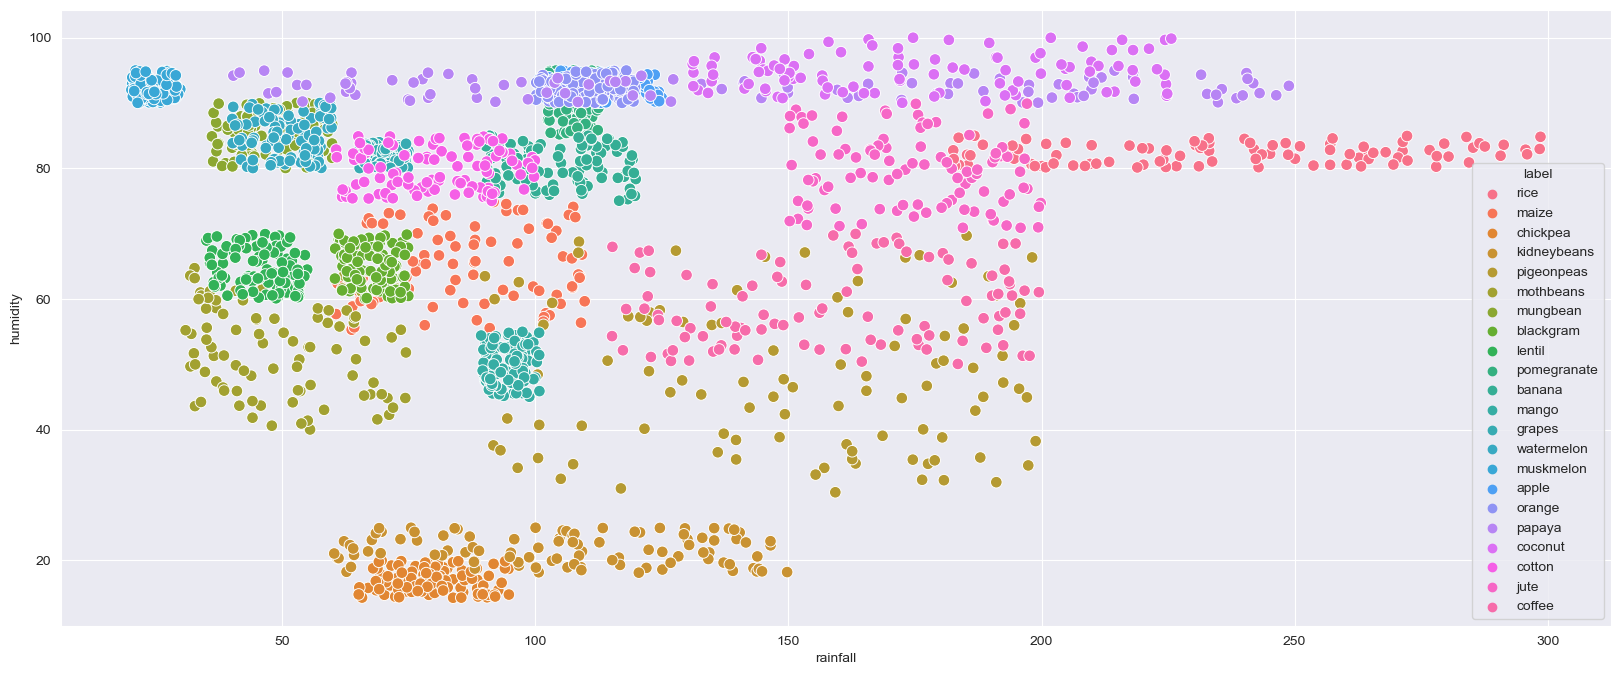

In [82]:
# In general, when precipitation increases, it increases with the degree of humidity
plt.figure(figsize=(20,8))
sns.scatterplot(data=crop, x="rainfall", y="humidity" , hue="label" ,s=70)
plt.show()

In [81]:
high_rainfall = crop[crop["rainfall"] > 100]
low_rainfall = crop[crop["rainfall"] < 80]
print("Min humidity at low rainfall:", low_rainfall["humidity"].min())
print("Min humidity at high rainfall:", high_rainfall["humidity"].min())
print("--- --- --- --- --- --- ---")
print("Max humidity at low rainfall:", low_rainfall["humidity"].max())
print("Max humidity at high rainfall:", high_rainfall["humidity"].max())
print("--- --- --- --- --- --- ---")
print("Avg humidity at low rainfall:", low_rainfall["humidity"].mean())
print("Avg humidity at high rainfall:", high_rainfall["humidity"].mean())

Min humidity at low rainfall: 14.2804191
Min humidity at high rainfall: 18.09224048
--- --- --- --- --- --- ---
Max humidity at low rainfall: 94.96218673
Max humidity at high rainfall: 99.98187601
--- --- --- --- --- --- ---
Avg humidity at low rainfall: 71.07705611700452
Avg humidity at high rainfall: 76.79911204936819


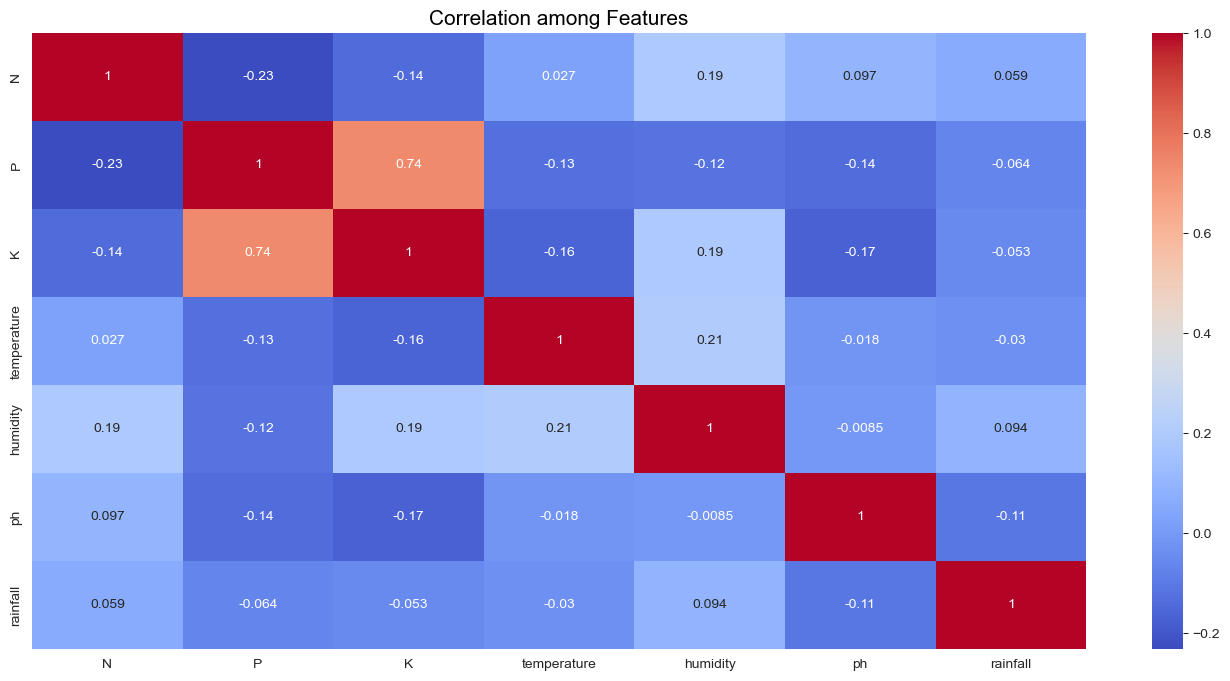

In [80]:
fig, ax = plt.subplots(figsize=(17, 8))
sns.heatmap(crop.corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation among Features', fontsize=15, color='black')
plt.show()

In [79]:
x = crop.drop(['label'], axis = 1)
y = crop['label']
print("The Shape of x:", x.shape)
print("The Shape of y:", y.shape)

The Shape of x: (2200, 7)
The Shape of y: (2200,)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,shuffle = True, random_state = 0)

In [76]:
# build the KNN model
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [75]:
# predict the results
y_pred=kn_classifier.predict(X_test)

D:\Users\Vifert\Utilities\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [73]:
pred_kn = kn_classifier.predict(X_test)

D:\Users\Vifert\Utilities\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [72]:
# Display the accuracy scores for training and test sets
train_score = kn_classifier.score(X_train, y_train)
test_score = kn_classifier.score(X_test, y_test)
print("Accuracy on the training set: {:.4f}".format(train_score))
print("Accuracy on the test set: {:.4f}".format(test_score))

Accuracy on the training set: 0.9886
Accuracy on the test set: 0.9773


D:\Users\Vifert\Utilities\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Users\Vifert\Utilities\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

D:\Users\Vifert\Utilities\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


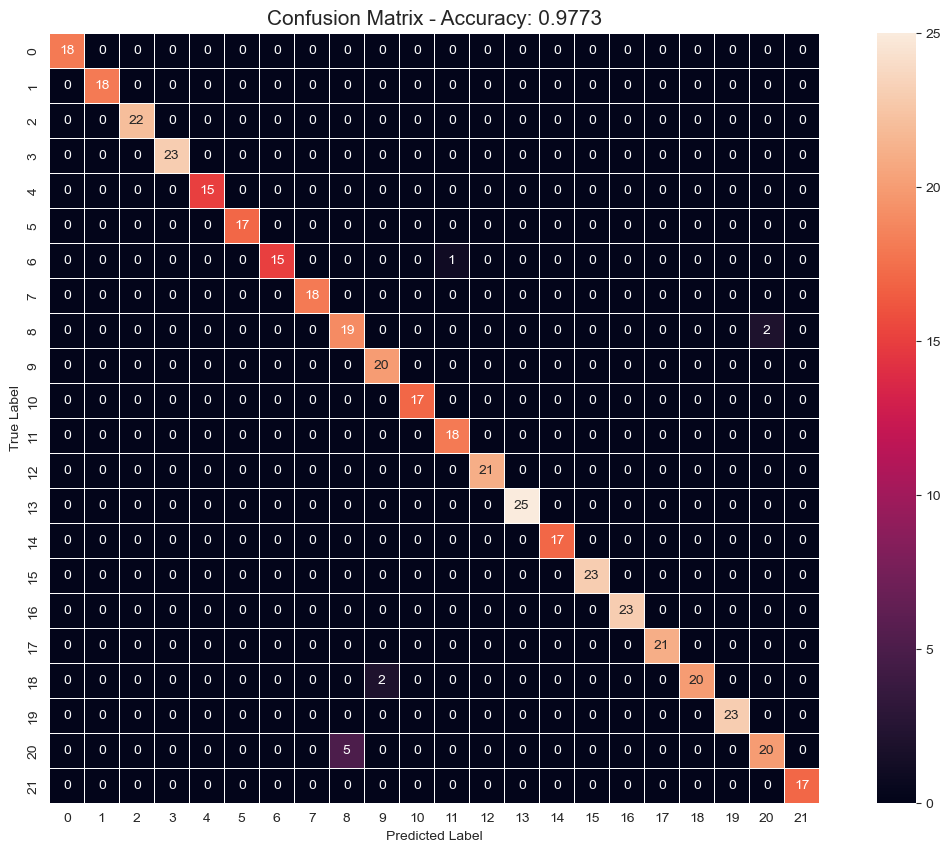

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, linewidths=.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
title = 'Confusion Matrix - Accuracy: {:.4f}'.format(kn_classifier.score(X_test, y_test))
plt.title(title, fontsize=15)
plt.show()

In [64]:
crop.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [67]:
newdata=kn_classifier.predict([[60,55,44,23.004459,82.320763,7.840207,263.964248]])
newdata

D:\Users\Vifert\Utilities\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Users\Vifert\Utilities\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['rice'], dtype=object)